(b) Assume that the input is composed of two independent Poisson spike trains. One
corresponds to inputs with synapse weights w = 1 (excitatory inputs), and the other
with w = −1 (inhibitory inputs). Denote the two input rates by νE and νI. Start with
a νE that gave an output spike rate of 20Hz in the previous part. Gradually increase
the νI, and plot the output ﬁring rate, and the coeﬃcient of variation for the inter-spike
interval (time between spikes). Make sure to plot some output spike trains. You can
represent them as raster plots.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
tau=10*10**(-3)
R=500*10**6
threshold=20*10**(-3)
delta_u=0.5*10**(-3)
# the spike rate of 20Hz corresponding to lamda=2.8x10^(-4)
lamdaE=[2.8*10**(-4)]


t0=0
u0=0

ddt=0.01*10**(-3)  # time increment 0.01ms




In [3]:
tf=[]
t_spikeE=np.random.exponential(lamdaE,10000)
firingrateE=np.zeros(len(lamdaE))
N=math.ceil(np.sum(t_spikeE)/ddt)
t=np.zeros(N)
u=np.zeros(N)
i=0
jE=0

dudt=0

t_durE=0

for i in range(1,N):
    t[i]=t[i-1]+ddt
    u[i]=u[i-1]+dudt*ddt
    t_durE=t_durE+ddt
    if u[i-1]>=threshold:
        u[i]=u0
        dudt=0
        tf.append(t[i-1])
    else:
        if t_durE>=t_spikeE[jE]:
            nspikeE=0
            t_dur_spikeE=t_spikeE[jE]
            while t_durE>=t_dur_spikeE:
                jE+=1
                nspikeE+=1
                t_dur_spikeE=t_dur_spikeE+t_spikeE[jE]
            u[i]=u[i]+nspikeE*delta_u
            t_durE=t_durE-t_dur_spikeE+t_spikeE[jE]
                
        dudt=-u[i]/tau
            
firingrateE=1/((tf[-1]-tf[0])/(len(tf)-1))      

In [4]:
# gradually increase lamda_I 
lamdaI=np.arange(5*10**(-3),1*10**(-1),5*10**(-3))  # 19 lamda_I
firingrate=np.zeros(len(lamdaI))
ftcoef=np.zeros(len(lamdaI))

u_lamda=[]
t_lamda=[]
for ii in range(len(lamdaI)):

    tf=[]
    t_spikeI=np.random.exponential(lamdaI[ii],10000)
    N=math.ceil(min(np.sum(t_spikeE),np.sum(t_spikeI))/ddt)
    t=np.zeros(N)
    u=np.zeros(N)
    i=0
    jE=0
    jI=0
    k=0
    dudt=0

    t_durE=0
    t_durI=0

    for i in range(1,N):
        t[i]=t[i-1]+ddt
        u[i]=u[i-1]+dudt*ddt
        t_durE=t_durE+ddt
        t_durI=t_durI+ddt
        if u[i-1]>=threshold:
            u[i]=u0
            dudt=0
            tf.append(t[i-1])
        else:
            if t_durE>=t_spikeE[jE]:
                nspikeE=0
                t_dur_spikeE=t_spikeE[jE]
                while t_durE>=t_dur_spikeE:
                    jE+=1
                    nspikeE+=1
                    t_dur_spikeE=t_dur_spikeE+t_spikeE[jE]
                u[i]=u[i]+nspikeE*delta_u
                t_durE=t_durE-t_dur_spikeE+t_spikeE[jE]
                
            if t_durI>=t_spikeI[jI]:
                nspikeI=0
                t_dur_spikeI=t_spikeI[jI]
                while t_durI>=t_dur_spikeI:
                    jI+=1
                    nspikeI+=1
                    t_dur_spikeI=t_dur_spikeI+t_spikeI[jI]
                u[i]=u[i]+nspikeI*(-delta_u)
                t_durI=t_durI-t_dur_spikeI+t_spikeI[jI]
            dudt=-u[i]/tau

    firingrate[ii]=1/((tf[-1]-tf[0])/(len(tf)-1))
    ftcoef[ii]=firingrateE/firingrate[ii]   # coefficient of variation for the inter-spike interval
    u_lamda.append(u)
    t_lamda.append(t)

Text(0.5, 1.0, 'Firing Rate')

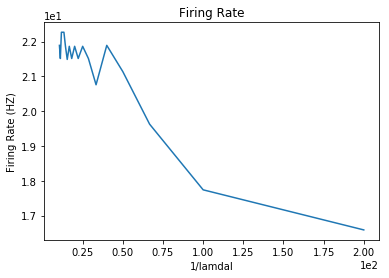

In [5]:
plt.plot(1/lamdaI,firingrate)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('1/lamdaI')
plt.ylabel('Firing Rate (HZ)')
plt.title('Firing Rate')

Text(0.5, 1.0, 'Spike train for lamda_E=2.8x10^4, lamda_I=0.005')

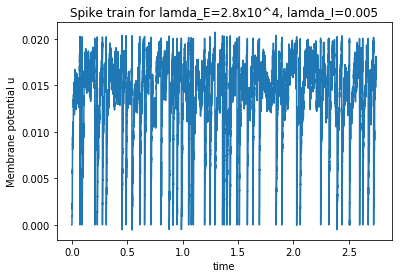

In [6]:
plt.figure()
plt.plot(t_lamda[0],u_lamda[0])
plt.xlabel('time')
plt.ylabel('Membrane potential u')
plt.title('Spike train for lamda_E=2.8x10^4, lamda_I=0.005')

Text(0.5, 1.0, 'Spike train for lamda_E=2.8x10^4, lamda_I=0.1')

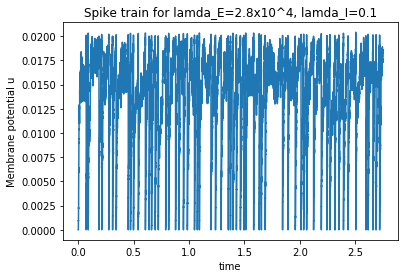

In [7]:
plt.figure()
plt.plot(t,u)
plt.xlabel('time')
plt.ylabel('Membrane potential u')
plt.title('Spike train for lamda_E=2.8x10^4, lamda_I=0.1')


Text(0.5, 1.0, 'Firing Time Variation Coefficient')

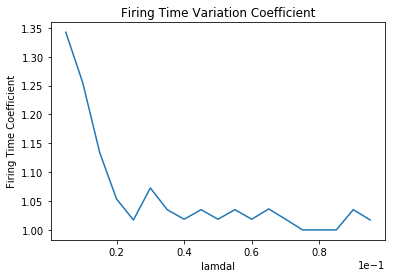

In [8]:
plt.plot(lamdaI,ftcoef)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('lamdaI')
plt.ylabel('Firing Time Coefficient')
plt.title('Firing Time Variation Coefficient')